## Bolus Glucose Control in Type 1 Diabetes Using Deep Reinforcement Learning
### Results
Raphael Joost, 18-109-504 & Yanis Schärer, 18-114-058

In [2]:
from Agent import DDPGAgent
from utils import make_env
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

C:\Users\yanis\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Explore Environment

In [ ]:
# Create environment
ado_avg = make_env('simglucose_average', 'average_adolescent')

State space:
 Dict('CGM': Box(0.0, 10000.0, (6,), float32), 'CHO': Box(0.0, 10000.0, (6,), float32), 'insulin': Box(0.0, 10000.0, (6,), float32))
Action space:
 Box(0.6, 1.4, (3,), float32)


In [ ]:
sample_observation, sample_info = ado_avg.reset() # Reset environment and get initial observation
sample_action = ado_avg.action_space.sample() # Sample a random action

print('Environment info:\n', sample_info, '\n')
print('Observation (flattened):\n', sample_observation, '\n')
print('Action:\n', sample_action, '\n')

Environment info:
 {'time': datetime.datetime(2018, 1, 1, 5, 58), 'meal': 0, 'patient_name': 'average_adolescent', 'sample_time': 3.0} 

Observation (flattened):
 [146.01509 146.01509 146.01509 146.01509 146.01509 146.01509   0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.     ] 

Action:
 [1.0886229  1.02921    0.75748515] 



#### Results for adolescent patients
Training is done on UBELIX. Therefore, the agent state is directly loaded from the respective files.

In [4]:
ado1 = make_env('simglucose_ado01', 'adolescent#001', print_space=False)
ado_agent = DDPGAgent(ado1)

In [5]:
ado_g_path = os.path.join('agent_states','adolescent_general_training_state')
ado_p_path = os.path.join('agent_states','adolescent_personalized_training_state')

##### After general training

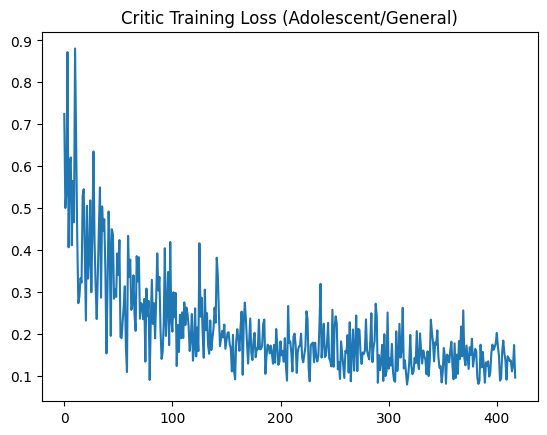

In [6]:
# Plot general training loss
with open(os.path.join(ado_g_path,'training_loss.json')) as f:
    ado_g_loss = json.load(f)

plt.plot([losses[0] for losses in ado_g_loss])
plt.title('Critic Training Loss (Adolescent/General)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [7]:
ado_agent.load_agent(ado_g_path)

Agent loaded from folder agent_states\adolescent_general_training_state


c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode finished.                       


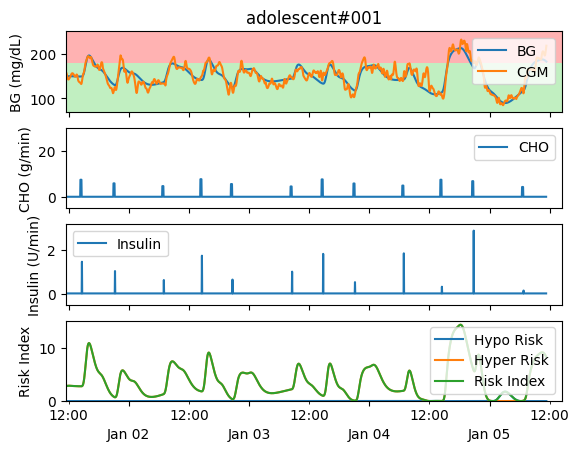

In [8]:
ado_g_metrics = ado_agent.evaluate_policy(render=True) # Evaluate policy on adolescent#001 (4 day sample)

In [9]:
print(f'Time in range (TIR): {ado_g_metrics["TIR"]:.2f}')
print(f'Time in hypoglycemic risk: {ado_g_metrics["hypo"]:.2f}')

Time in range (TIR): 0.85
Time in hypoglycemic risk: 0.00


In [ ]:
# Import metrics from ubelix
with open(os.path.join('evaluation', 'metrics', 'ado_g_metrics.json')) as f:
    ado_g_metrics = json.load(f)

# Calculate survival rate
ado_g_isalive = [m['is_alive'] for m in ado_g_metrics]
print(f'{sum(ado_g_isalive)}/{len(ado_g_isalive)} patients survived.')

# Calculate TIR
ado_g_tir = [m['TIR'] for m in ado_g_metrics]
print(f'TIR: {np.mean(ado_g_tir):.2f} +/- {np.std(ado_g_tir):.2f}')

# Calculate hypo
ado_g_hypo = [m['hypo'] for m in ado_g_metrics]
print(f'Hypo: {np.mean(ado_g_hypo):.2f} +/- {np.std(ado_g_hypo):.2f}')

##### After personalized training

In [1]:
# Plot personalized training loss
with open(os.path.join(ado_g_path,'training_loss.json')) as f:
    ado_g_loss = json.load(f)

plt.plot([losses[0] for losses in ado_g_loss])
plt.title('Critic Training Loss (Adolescent/Personalized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

NameError: name 'ado_g_path' is not defined

In [11]:
ado_agent.load_agent(ado_p_path)

Agent loaded from folder agent_states\adolescent_personalized_training_state


Episode finished.                       


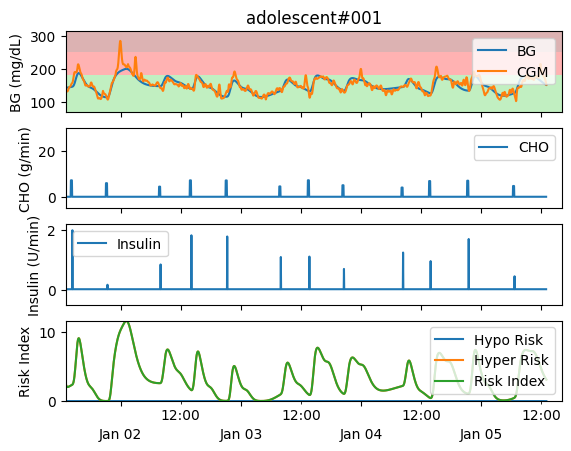

In [12]:
ado_p_metrics = ado_agent.evaluate_policy(render=True) # Evaluate policy on adolescent#001 (4 day sample)

In [13]:
print(f'Time in range (TIR): {ado_p_metrics["TIR"]:.2f}')
print(f'Time in hypoglycemic risk: {ado_p_metrics["hypo"]:.2f}')

Time in range (TIR): 0.90
Time in hypoglycemic risk: 0.00


In [ ]:
# Import metrics from ubelix
with open(os.path.join('evaluation', 'metrics', 'ado_p_metrics.json')) as f:
    ado_p_metrics = json.load(f)

# Calculate survival rate
ado_p_isalive = [m['is_alive'] for m in ado_p_metrics]
print(f'{sum(ado_p_isalive)}/{len(ado_p_isalive)} patients survived.')

# Calculate TIR
ado_p_tir = [m['TIR'] for m in ado_p_metrics]
print(f'TIR: {np.mean(ado_p_tir):.2f} +/- {np.std(ado_p_tir):.2f}')

# Calculate hypo
ado_p_hypo = [m['hypo'] for m in ado_p_metrics]
print(f'Hypo: {np.mean(ado_p_hypo):.2f} +/- {np.std(ado_p_hypo):.2f}')

#### Results for adult patients
Training is done on UBELIX. Therefore, the agent state is directly loaded from the respective files.

In [2]:
adu1 = make_env('simglucose_adu01', 'adult#001', print_space=False)
adu_agent = DDPGAgent(adu1)

In [3]:
adu_g_path = os.path.join('agent_states','adult_general_training_state')
adu_p_path = os.path.join('agent_states','adult_personalized_training_state')

##### After general training

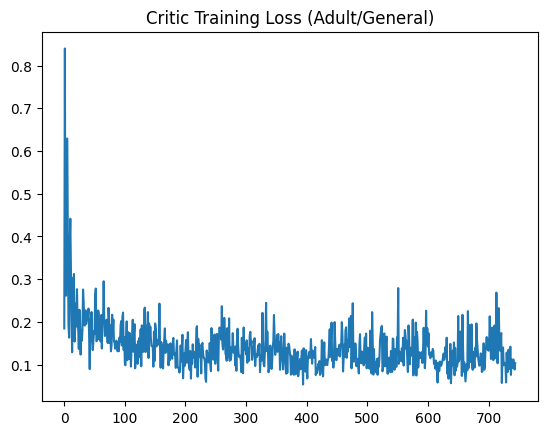

In [4]:
# Plot general training loss
with open(os.path.join(adu_g_path,'training_loss.json')) as f:
    adu_g_loss = json.load(f)

plt.plot([losses[0] for losses in adu_g_loss])
plt.title('Critic Training Loss (Adult/General)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [5]:
adu_agent.load_agent(adu_g_path)

Agent loaded from folder agent_states\adult_general_training_state


c:\Users\yanis\anaconda3\envs\simgl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode finished.                       


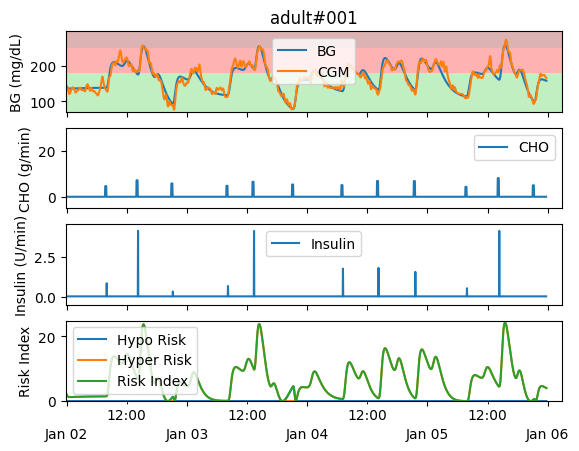

In [6]:
adu_g_metrics = adu_agent.evaluate_policy(render=True) # Evaluate policy on adult#001 (4 day sample)

In [7]:
print(f'Time in range (TIR): {adu_g_metrics["TIR"]:.2f}')
print(f'Time in hypoglycemic risk: {adu_g_metrics["hypo"]:.2f}')

Time in range (TIR): 0.60
Time in hypoglycemic risk: 0.00


In [ ]:
# Import metrics from ubelix
with open(os.path.join('evaluation', 'metrics', 'adu_g_metrics.json')) as f:
    adu_g_metrics = json.load(f)

# Calculate survival rate
adu_g_isalive = [m['is_alive'] for m in ado_g_metrics]
print(f'{sum(adu_g_isalive)}/{len(adu_g_isalive)} patients survived.')

# Calculate TIR
adu_g_tir = [m['TIR'] for m in ado_g_metrics]
print(f'TIR: {np.mean(adu_g_tir):.2f} +/- {np.std(adu_g_tir):.2f}')

# Calculate hypo
adu_g_hypo = [m['hypo'] for m in ado_g_metrics]
print(f'Hypo: {np.mean(adu_g_hypo):.2f} +/- {np.std(adu_g_hypo):.2f}')

##### After personalized training

In [14]:
# Plot personalized training loss
with open(os.path.join(adu_p_path,'training_loss.json')) as f:
    adu_p_loss = json.load(f)

plt.plot([losses[0] for losses in adu_p_loss])
plt.title('Critic Training Loss (Adult/Personalized)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

NameError: name 'adu_p_path' is not defined

In [9]:
adu_agent.load_agent(adu_p_path)

Agent loaded from folder agent_states\adult_personalized_training_state


Episode finished.                       


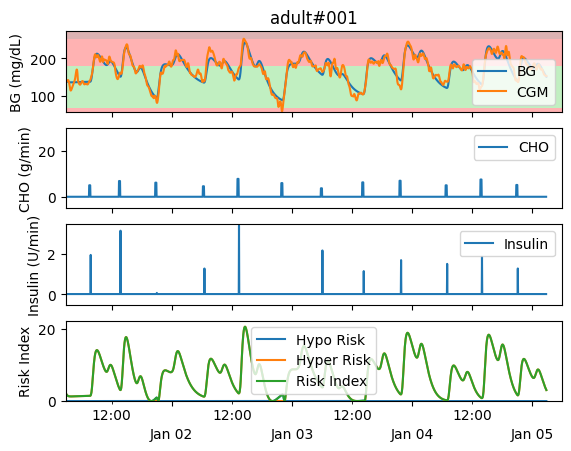

In [10]:
adu_p_metrics = adu_agent.evaluate_policy(render=True) # Evaluate policy on adult#001 (4 day sample)

In [11]:
print(f'Time in range (TIR): {adu_p_metrics["TIR"]:.2f}')
print(f'Time in hypoglycemic risk: {adu_p_metrics["hypo"]:.2f}')

Time in range (TIR): 0.55
Time in hypoglycemic risk: 0.00


In [ ]:
# Import metrics from ubelix
with open(os.path.join('evaluation', 'metrics', 'adu_p_metrics.json')) as f:
    adu_p_metrics = json.load(f)

# Calculate survival rate
adu_p_isalive = [m['is_alive'] for m in adu_p_metrics]
print(f'{sum(adu_p_isalive)}/{len(adu_p_isalive)} patients survived.')

# Calculate TIR
adu_p_tir = [m['TIR'] for m in adu_p_metrics]
print(f'TIR: {np.mean(adu_p_tir):.2f} +/- {np.std(adu_p_tir):.2f}')

# Calculate hypo
adu_p_hypo = [m['hypo'] for m in adu_p_metrics]
print(f'Hypo: {np.mean(adu_p_hypo):.2f} +/- {np.std(adu_p_hypo):.2f}')